In [1]:
import requests
import io
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def readData(url):
    urlData = requests.get(url).content
    string = urlData.decode('utf-8')
    return pd.read_csv(io.StringIO(string))
def plotDfs(dfs):
    fig, ax = plt.subplots(ncols=1, nrows=1)
    fig.set_size_inches(20,5)
    ax.set_yscale("log")
    ax.grid(True, which="minor", axis="y", color='g', linestyle='--', linewidth=1)
    ax.grid(True, which="major", axis="y", color='g', linestyle='-', linewidth=2)

    for label, df in dfs.items():
        df = df.groupby(["data"]).agg({"totale_casi":"sum"}).reset_index()
        df.plot(
            x="data", y="totale_casi", style="o", ax=ax, label=label
        )
    plt.show()

In [3]:
base_url = "https://github.com/pcm-dpc/COVID-19/raw/master/"
url_provinci = "dati-province/dpc-covid19-ita-province.csv"
url_regioni = "dati-regioni/dpc-covid19-ita-regioni.csv"

# Data per Province (only confirmed cases)

In [5]:
df = readData(base_url+url_provinci)
df["data"] = pd.to_datetime(df["data"])

In [6]:
smallDf_Bergamo = df[(df["denominazione_regione"]=="Lombardia") & (df["denominazione_provincia"]=="Bergamo")]
smallDf_Lombardia = df[(df["denominazione_regione"]=="Lombardia")]

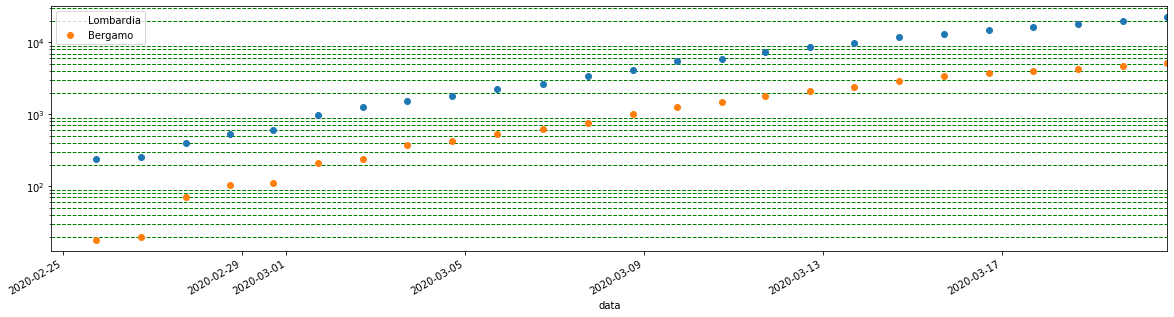

In [7]:
plotDfs({"Lombardia": smallDf_Lombardia, "Bergamo": smallDf_Bergamo})